In [ ]:
# %pip install mlxtend --upgrade

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Importing various libraries

import numpy as np                        # Arrays
import pandas as pd                       # DataFrames
import tensorflow as tf                   # CNN
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense,Input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import  MaxPooling2D, ZeroPadding2D,Conv2D
from keras.layers import Dense, Input, Activation, Flatten,add,BatchNormalization
from tensorflow.keras import optimizers
from keras import applications
from keras.models import Model
from keras import models
from keras.applications.mobilenet import MobileNet
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
!pip install keract
from keract import get_activations

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.applications.imagenet_utils import preprocess_input
import keract

import os
from PIL import Image

import pylab as pl

from collections import OrderedDict

# Mounting drive to place the data

drive.mount('/content/drive')
%cd /content/drive/MyDrive/FER

# Saving constant values

emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/FER


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255 
                                  #  ,featurewise_center=False, samplewise_center=False,featurewise_std_normalization=False, samplewise_std_normalization=False,zca_whitening=False, zca_epsilon=1e-06 , brightness_range=None, fill_mode='nearest', cval=0.0
                                   ,rotation_range=0.2
                                  #  , width_shift_range=0.2
                                  #  , height_shift_range=0.1
                                  #  , shear_range=0.1
                                  #  , zoom_range=0.1
                                  #  ,channel_shift_range=0.1
                                  #  ,horizontal_flip=True
                                  #  , vertical_flip=True 
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 200
train_generator = train_datagen.flow_from_directory("data/train",target_size=(224, 224),color_mode='rgb',batch_size= batch_size,class_mode='categorical',seed=1,shuffle = False)
test_generator = test_datagen.flow_from_directory("data/test",target_size=(224, 224),color_mode='rgb',batch_size=batch_size,class_mode='categorical',seed=1, shuffle = False)

number_of_epochs = 10

im1 =Input(shape=(224,224,3))
y=MobileNet(input_shape=(224,224,3), include_top=False, weights='imagenet', input_tensor=im1, classes=7,)
x=Flatten()(y.output)
out = Dense(7, activation='softmax')(x)
model = Model(inputs=[im1],outputs= out)

penalty = 1
regularizer = tf.keras.regularizers.l2(penalty)

for layer in model.layers:
    for attr in ['kernel_regularizer']:
        if hasattr(layer, attr):
          setattr(layer, attr, regularizer)
    for attr in ['bias_regularizer']:
        if hasattr(layer, attr):
          setattr(layer, attr, regularizer)

opt=optimizers.Adam(learning_rate=1e-4)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
history=model.fit(
        train_generator,
        steps_per_epoch = train_generator.samples // train_generator.batch_size + 1,
        epochs=50,
        validation_data = test_generator
        )

train_acc = str(model.evaluate(train_generator)[1])
test_acc = str(model.evaluate(test_generator)[1])
print("Training accuracy : "+ train_acc)
print("Testing accuracy : "+ test_acc)

Found 2441 images belonging to 7 classes.
Found 611 images belonging to 7 classes.
Epoch 1/50
13/13 [==============================] - 66s 3s/step - loss: 8.5867 - accuracy: 0.0520 - val_loss: 4.6709 - val_accuracy: 0.1506
Epoch 2/50
13/13 [==============================] - 44s 3s/step - loss: 4.0722 - accuracy: 0.2745 - val_loss: 4.3468 - val_accuracy: 0.1702
Epoch 3/50
13/13 [==============================] - 44s 3s/step - loss: 3.0275 - accuracy: 0.4023 - val_loss: 3.4974 - val_accuracy: 0.1702
Epoch 4/50
13/13 [==============================] - 45s 3s/step - loss: 1.3210 - accuracy: 0.6002 - val_loss: 3.2293 - val_accuracy: 0.2373
Epoch 5/50
13/13 [==============================] - 45s 3s/step - loss: 0.6842 - accuracy: 0.8140 - val_loss: 3.1303 - val_accuracy: 0.1948
Epoch 6/50
13/13 [==============================] - 45s 3s/step - loss: 0.1761 - accuracy: 0.9496 - val_loss: 2.8146 - val_accuracy: 0.2308
Epoch 7/50
13/13 [==============================] - 44s 3s/step - loss: 0.078

In [ ]:
# model.save('FER45%')
# model = tf.keras.models.load_model('FER45%')
# model.summary()

In [ ]:
train_prob = model.predict(train_generator)
train_pred = np.argmax(train_prob, axis=1)
train_real = train_generator.classes
train_accuracy = np.mean(train_pred == train_real)
print("train_accuracy",train_accuracy)

conf_mat = confusion_matrix(train_real, train_pred)
print(pd.DataFrame(conf_mat, columns=emotions.values(), index=emotions.values()))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

test_prob = model.predict(test_generator)
test_pred = np.argmax(test_prob, axis=1)
test_real = test_generator.classes
test_accuracy = np.mean(test_pred == test_real)
print(test_accuracy)

conf_mat = confusion_matrix(test_real, test_pred)
print(pd.DataFrame(conf_mat, columns=emotions.values(), index=emotions.values()))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

print(classification_report(train_real, train_pred, target_names=emotions.values()))
print(classification_report(test_real, test_pred, target_names=emotions.values()))

In [ ]:
model.evaluate(train_generator, steps = train_generator.samples // train_generator.batch_size)
model.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)

3/3 [==============================] - 60s 29s/step - loss: 5945.9409 - accuracy: 0.4583


[5945.94091796875, 0.4583333432674408]

(1, 224, 224, 3)
input_29 (1, 224, 224, 3) 


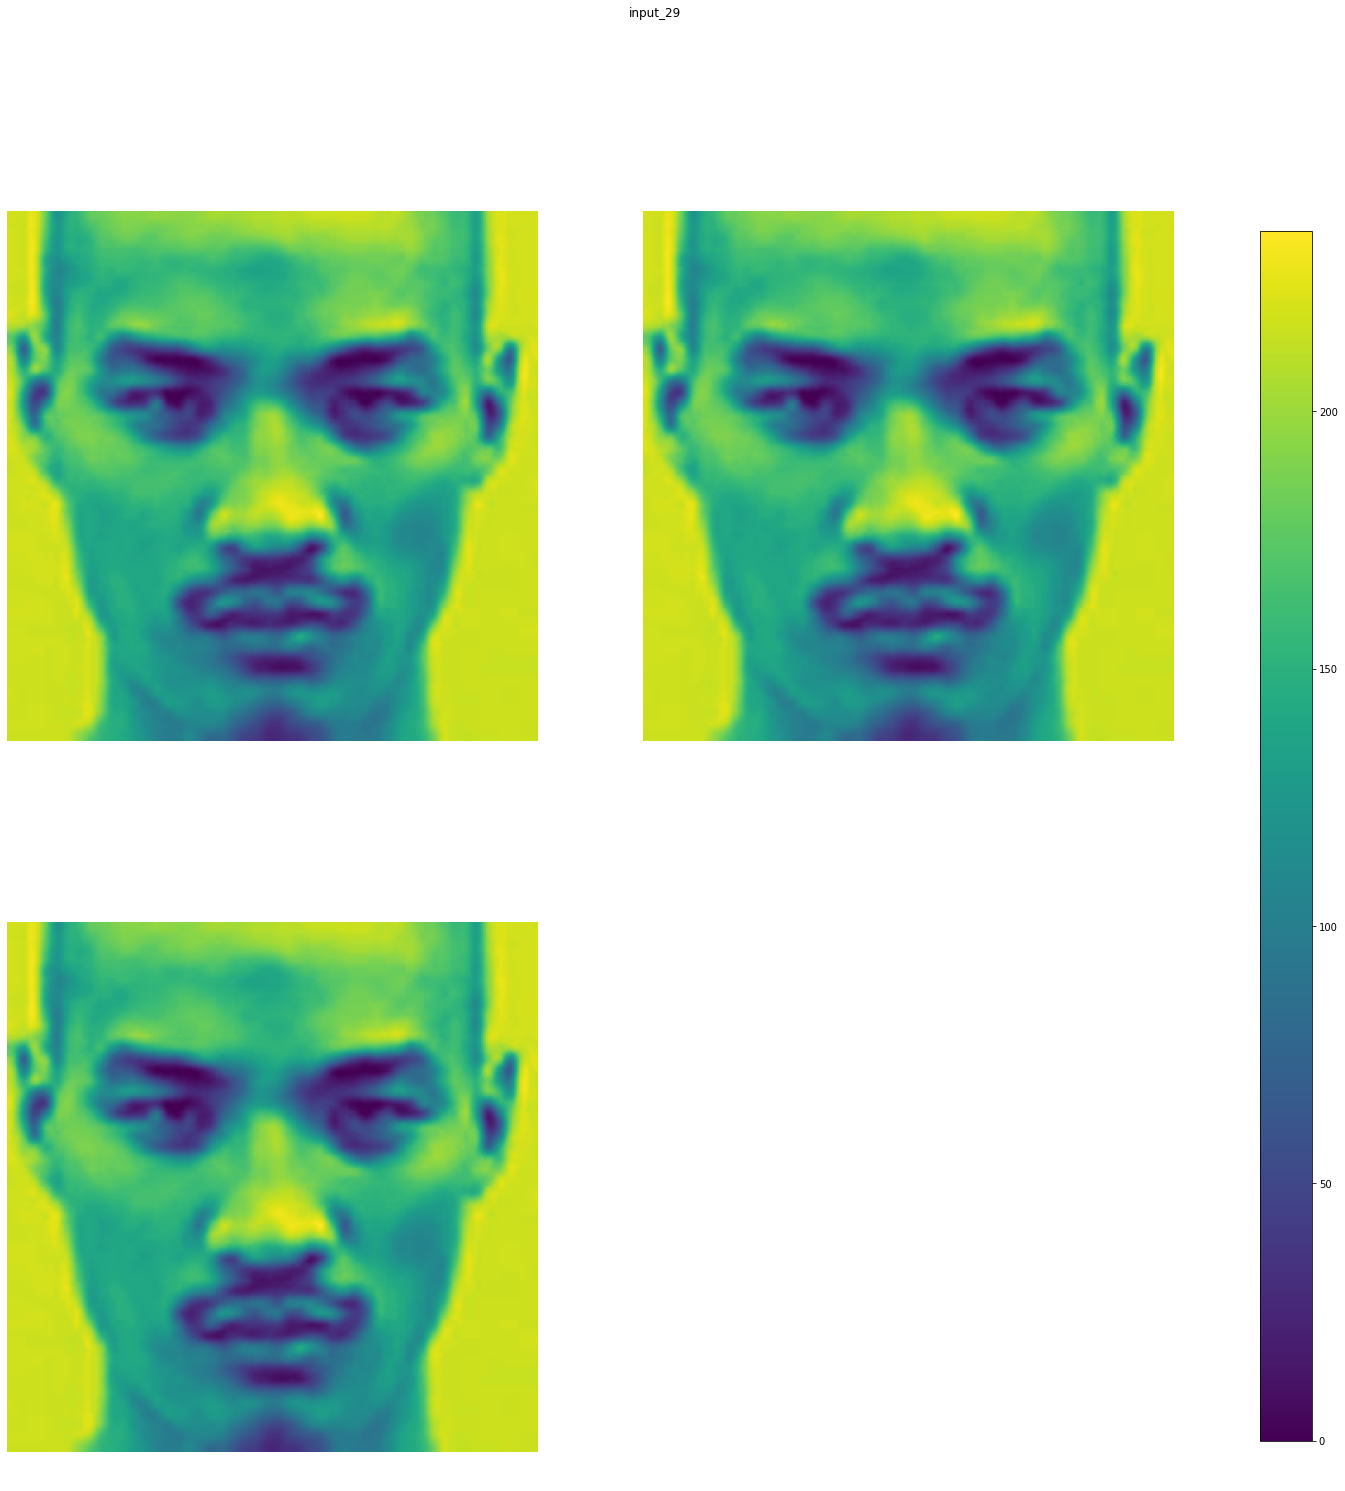

conv1 (1, 112, 112, 32) 


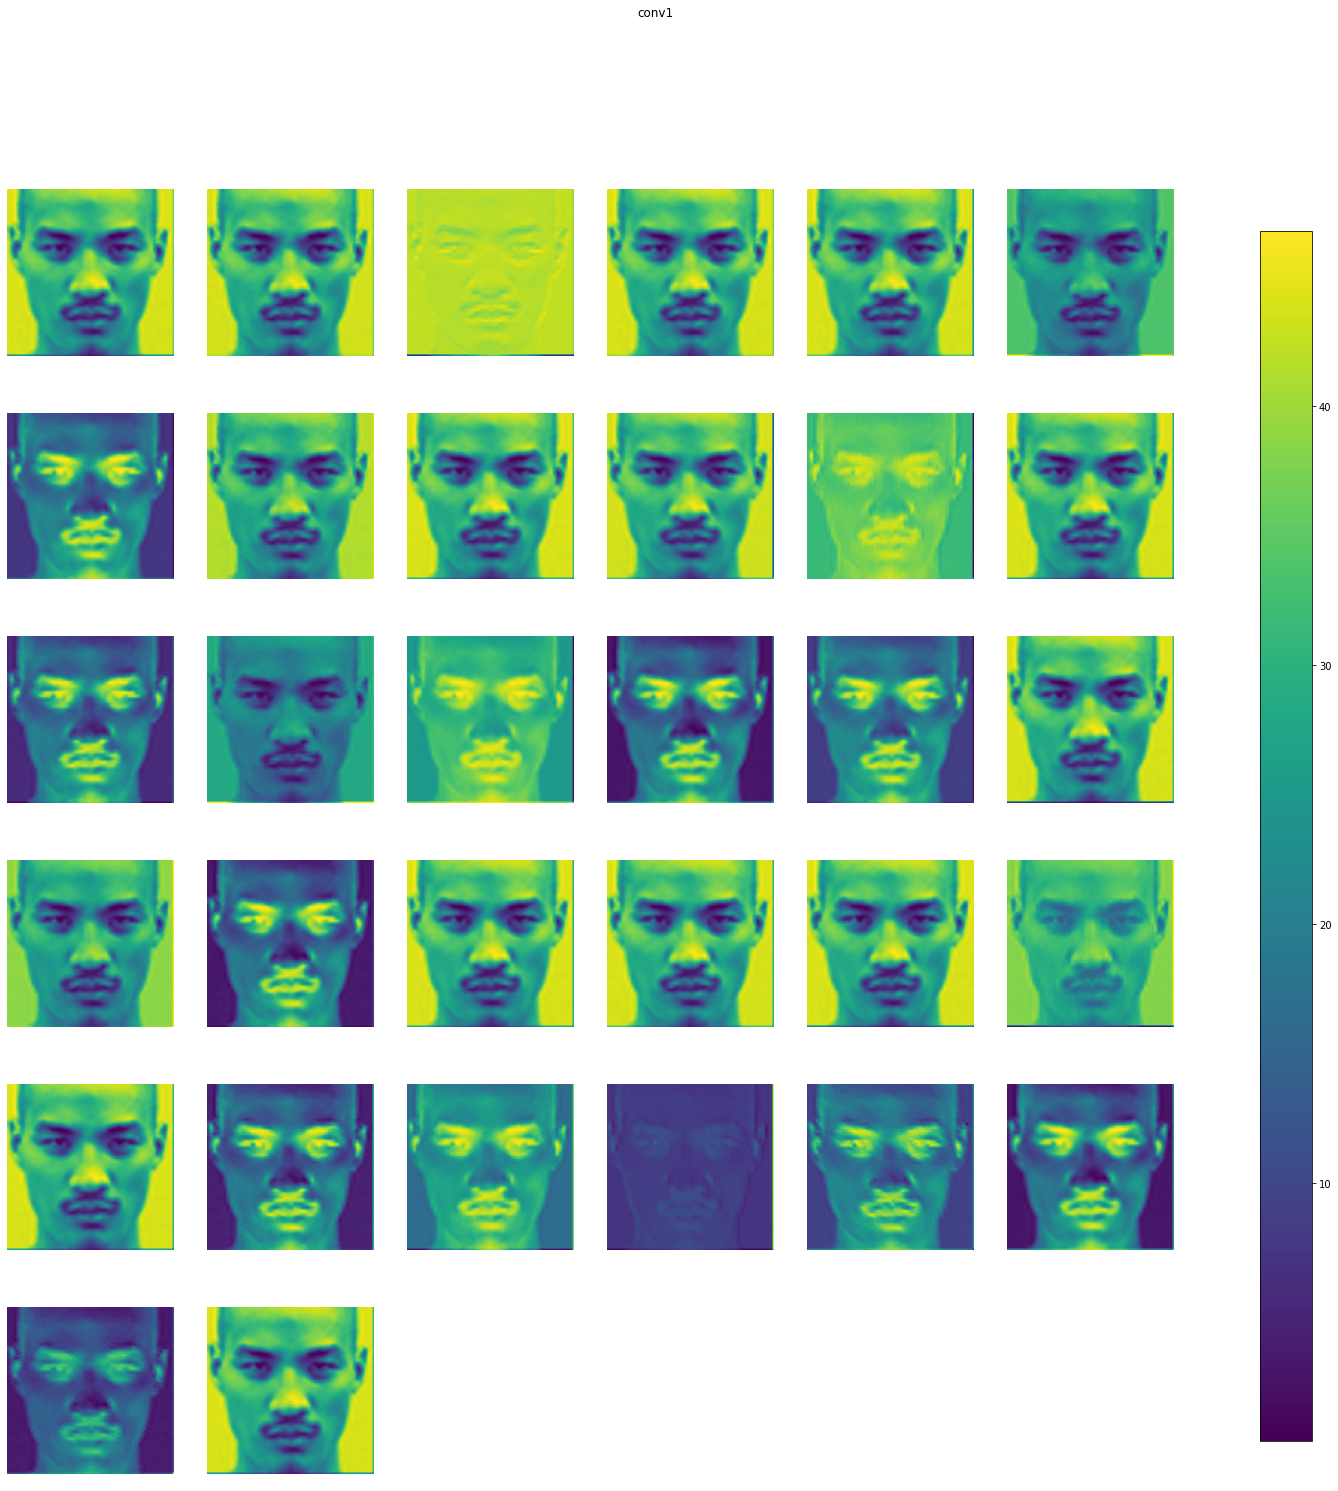

conv1_bn (1, 112, 112, 32) 


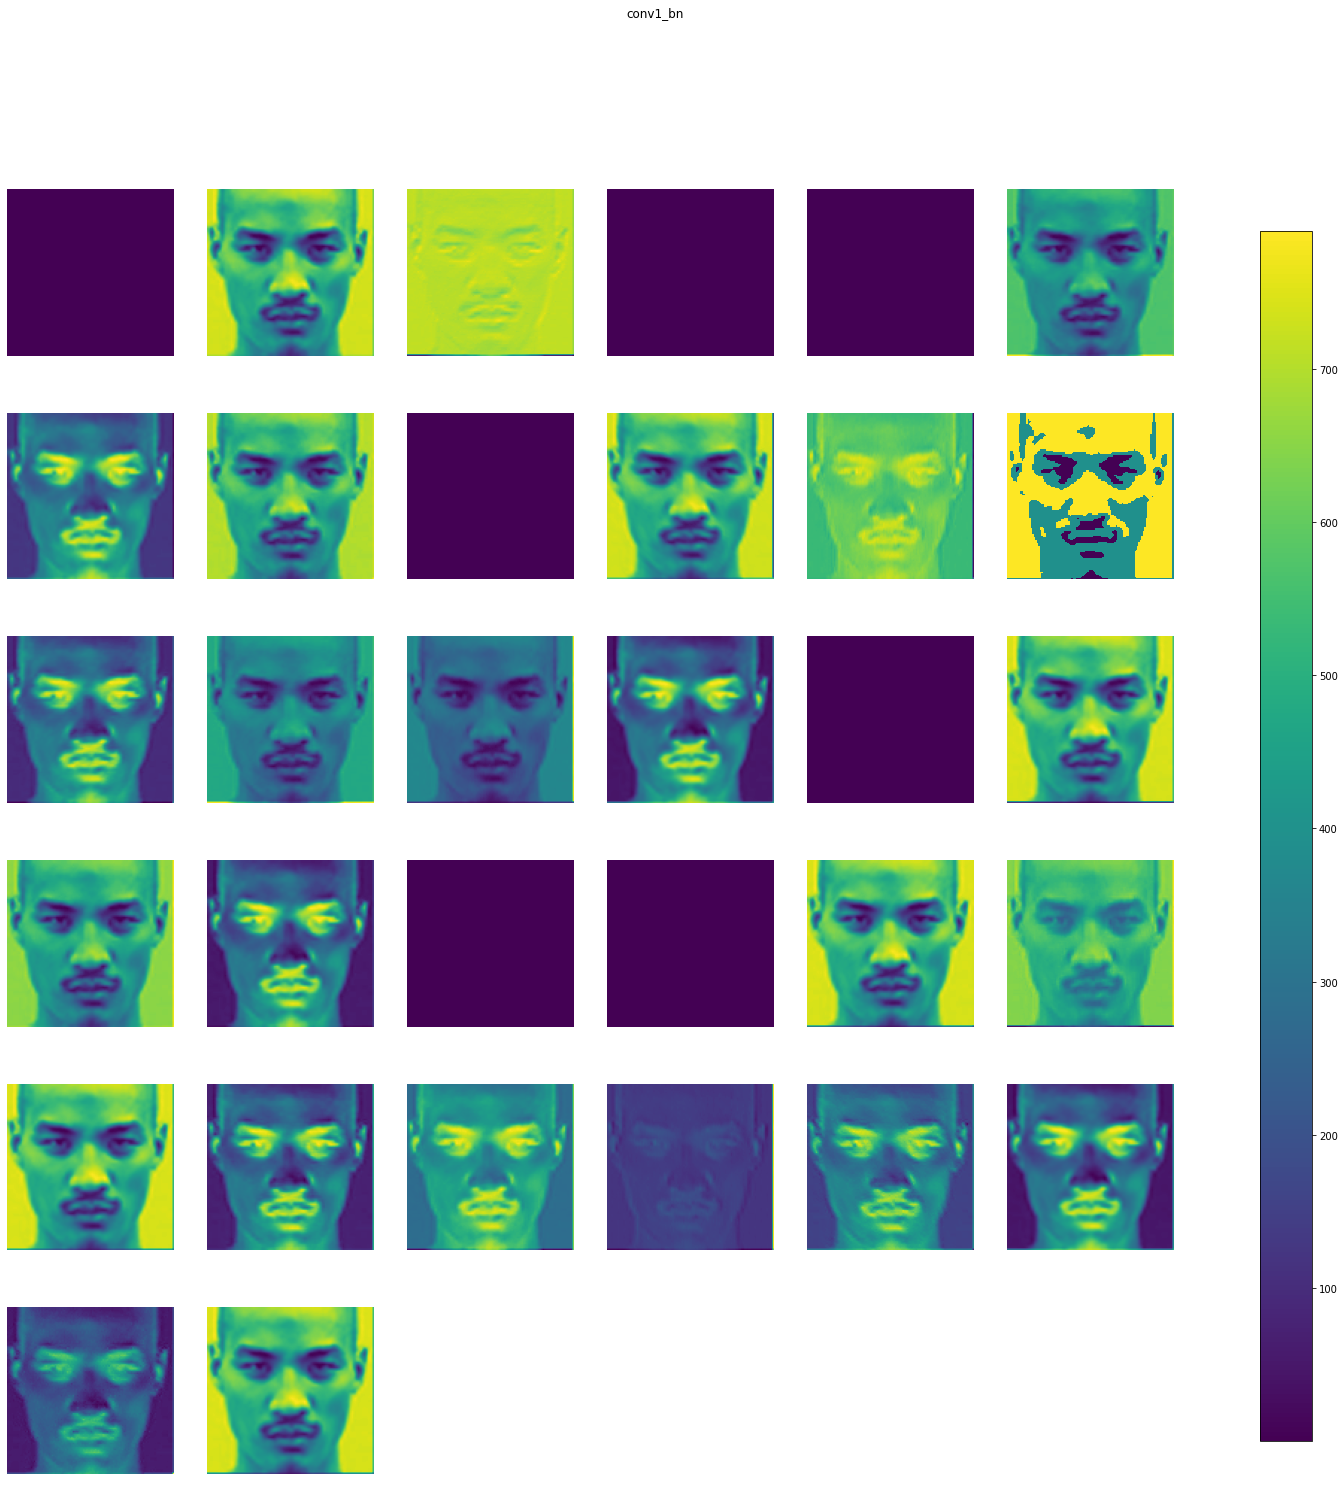

conv1_relu (1, 112, 112, 32) 


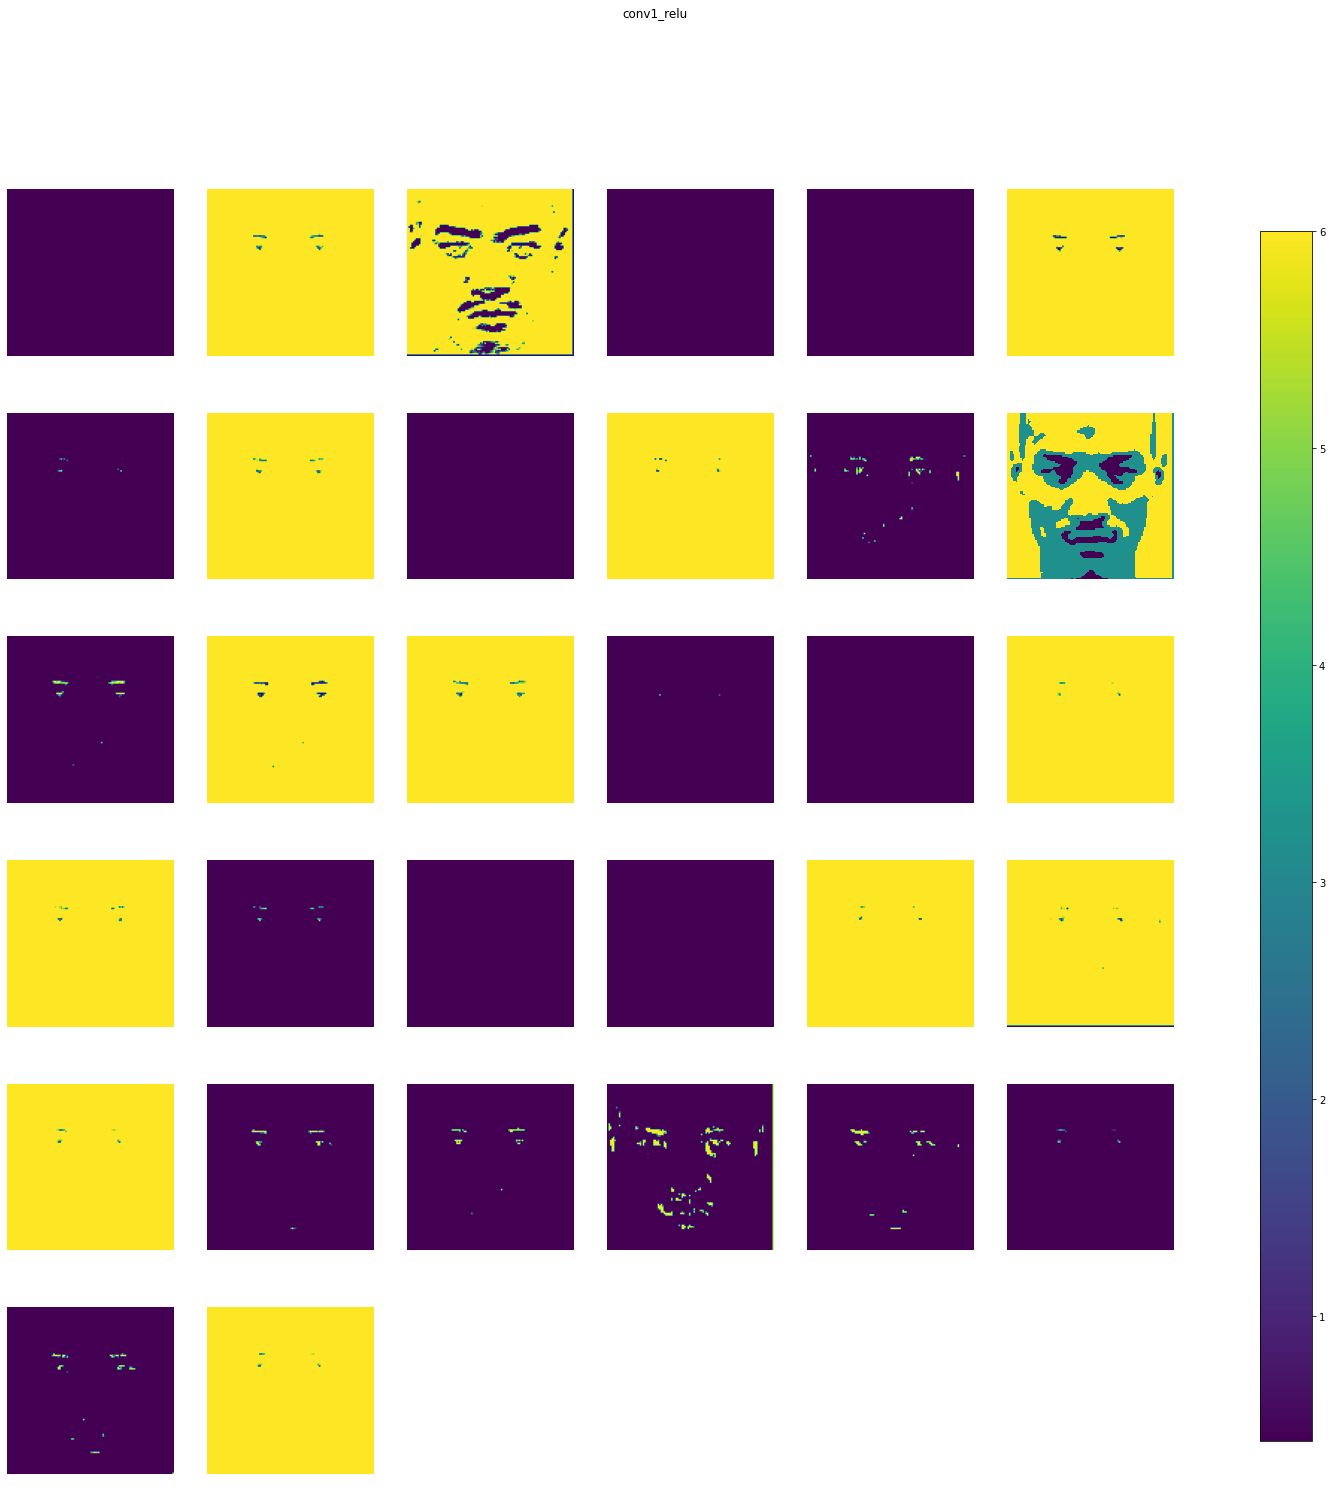

conv_dw_1 (1, 112, 112, 32) 


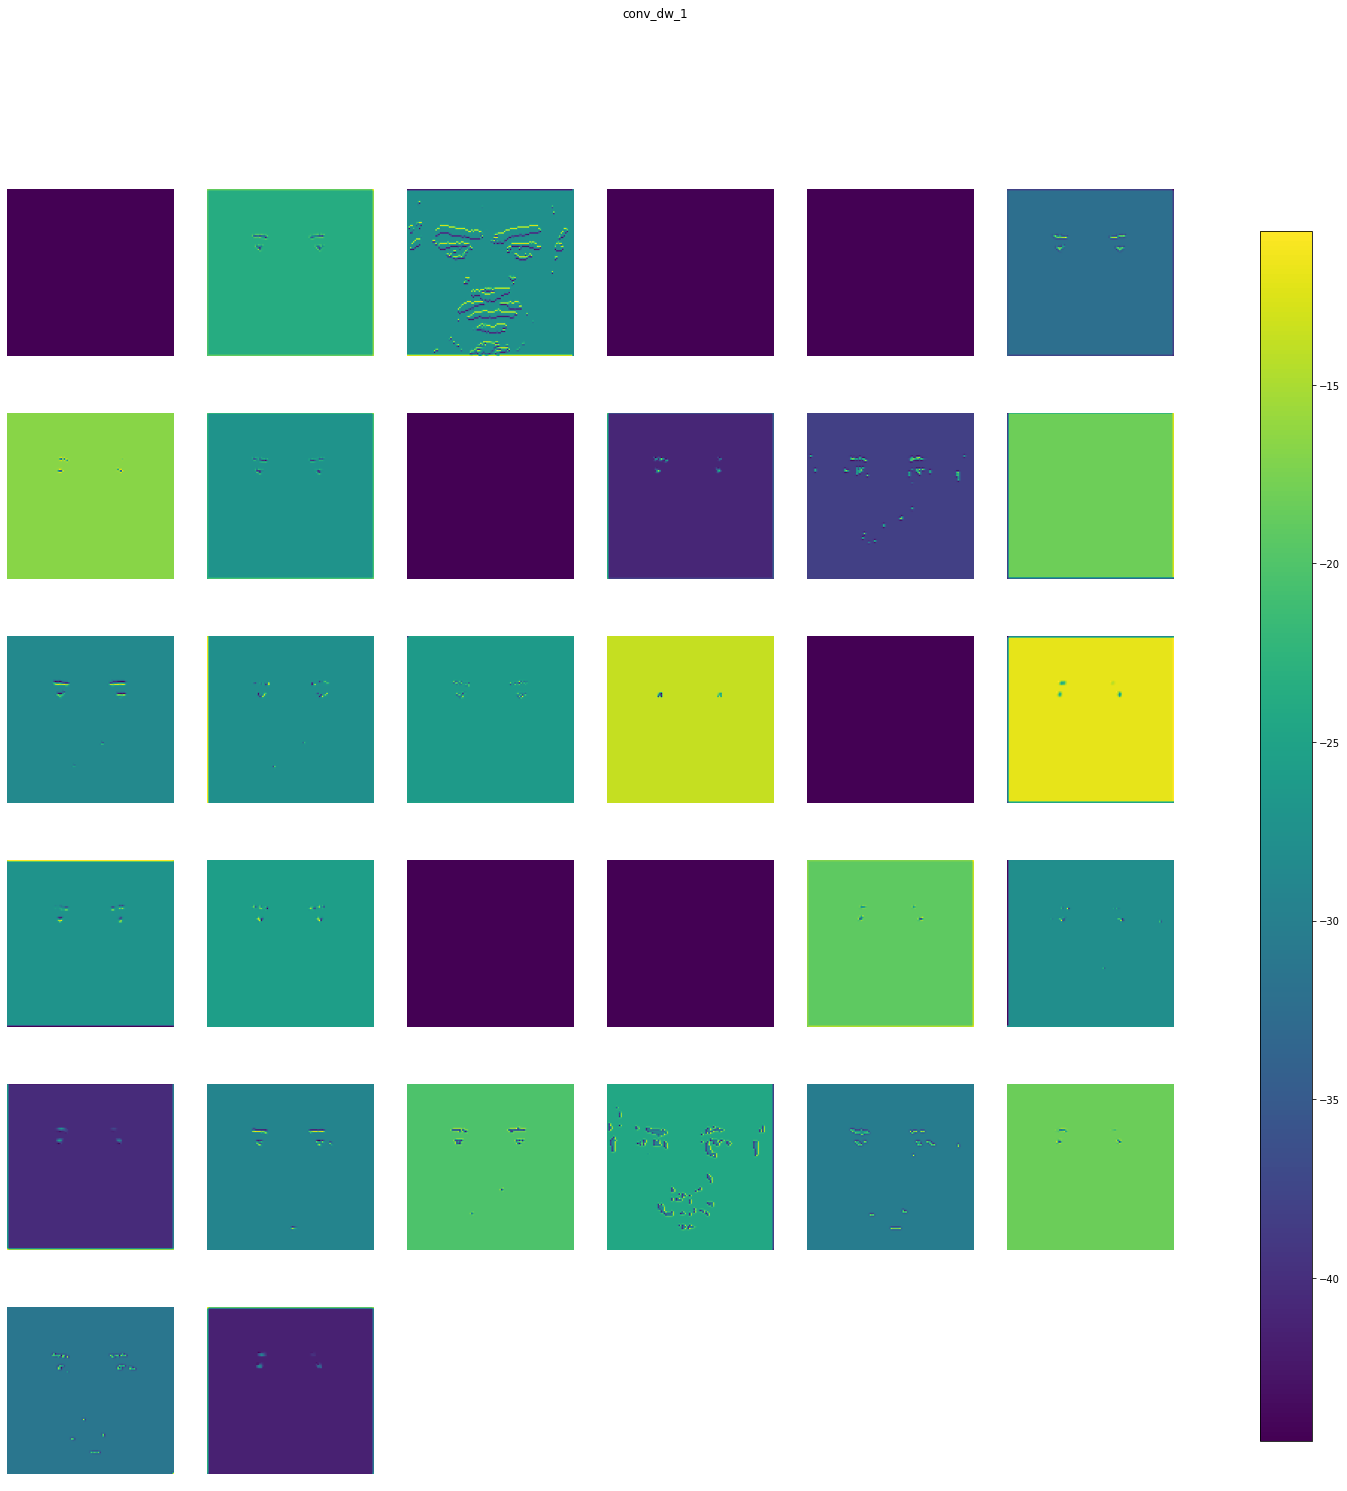

conv_dw_1_bn (1, 112, 112, 32) 


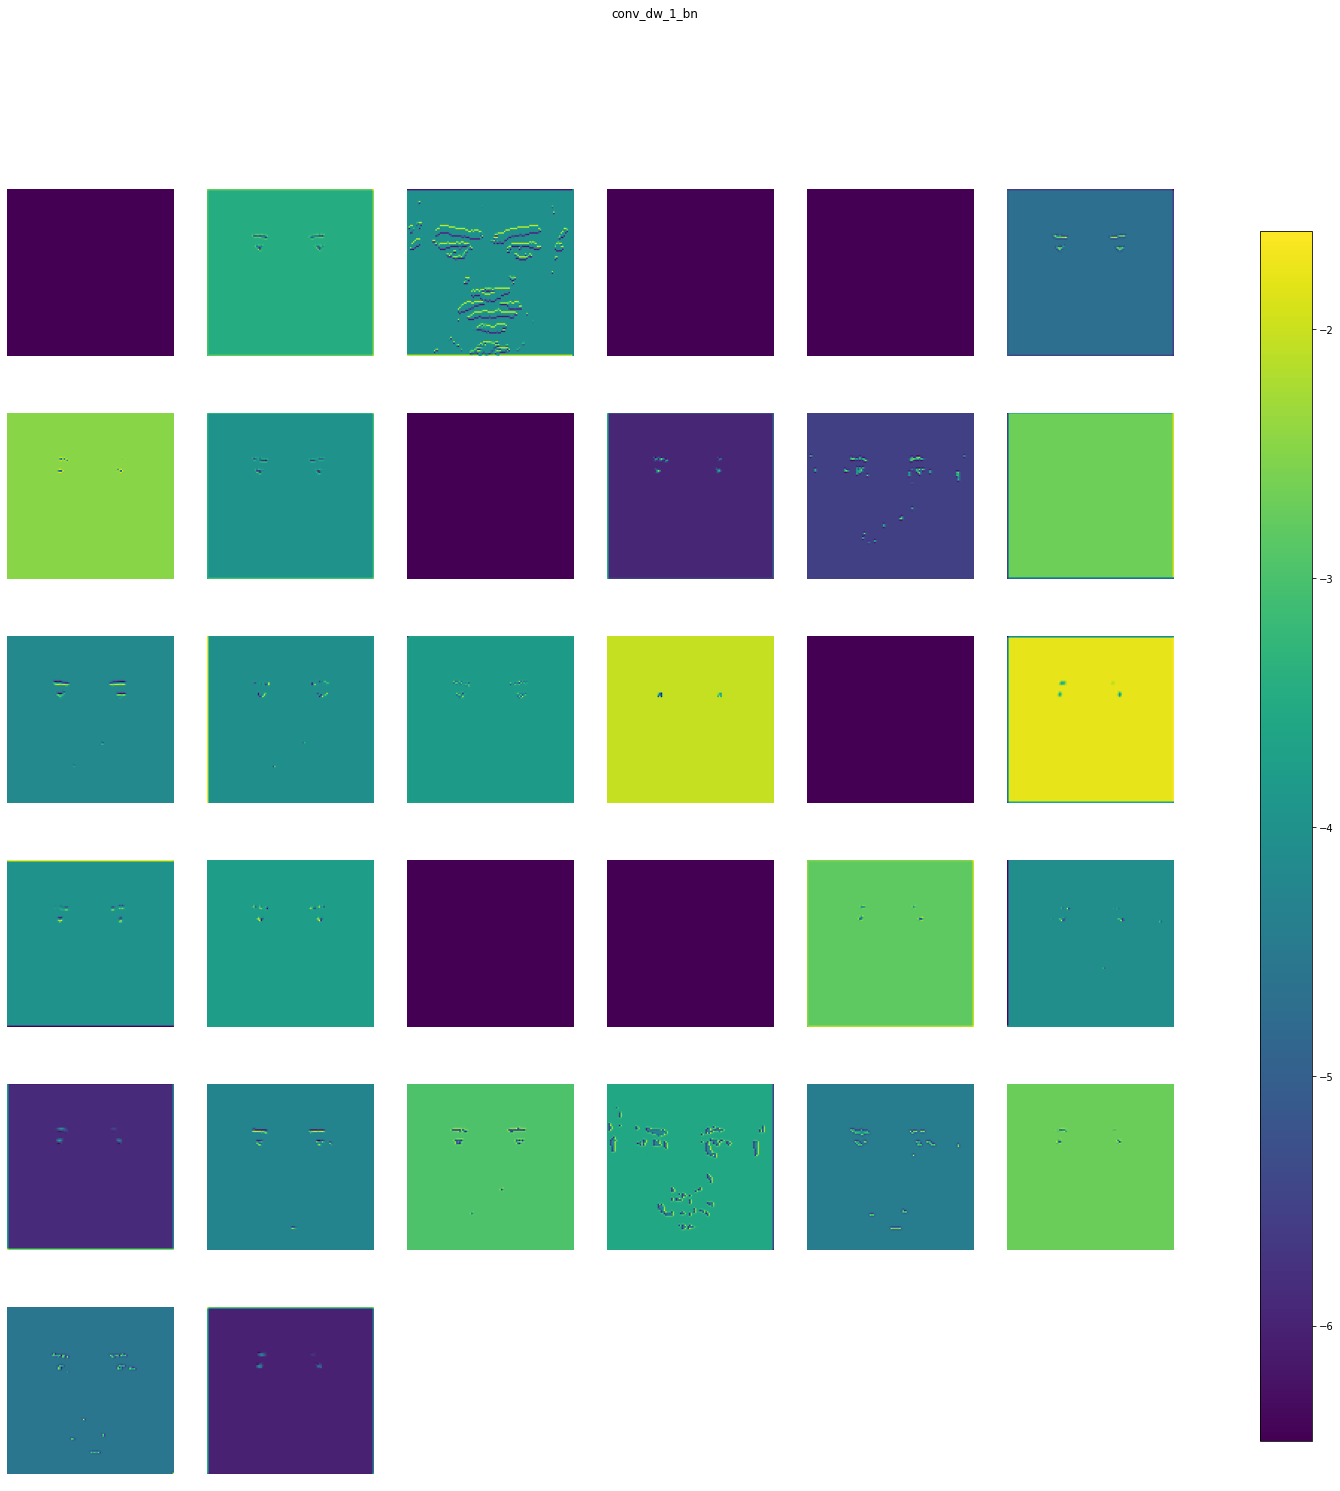

In [ ]:
# img_path = 'data/train/Neutral/1.jpeg'
# image = load_img(img_path, target_size=(224, 224))
# image = img_to_array(image)
# image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# print(image.shape)
# activations = keract.get_activations(model,image)
#                                                                                                                                       # keract.display_activations(activations)
# for i in range(6):
#   cur_layer = list(activations.items())[i]  
#   keract.display_activations(OrderedDict( [ (cur_layer[0], cur_layer[1]) ] ))

**DATA PREPROCESSING**

In [ ]:
# # Loading the dataset

# def prepare_data(data):
#     image_array = np.zeros(shape=(len(data), 48, 48))

#     for i in range(len(data)):
#         image = np.fromstring(data[i], dtype=int, sep=' ')
#         image = np.reshape(image, (48, 48)) 
#         image_array[i, :, :] = image / 255

#     return image_array


# data = pd.read_csv('train.csv').values  
# np.random.shuffle(data)

# all_raw_X = prepare_data(data[:,1]) 
# all_raw_Y = data[:,0]


# # Balancing the dataset 

# count = np.zeros(7, int)
# selected_raw_X = np.zeros((436 * 7 , 48, 48))
# selected_raw_Y = np.zeros((436 * 7,1))
# selected_count = 0
# for i in range(len(all_raw_X)):
#   if(count[all_raw_Y[i]] < 436):
#     selected_raw_X[selected_count] = all_raw_X[i]
#     selected_raw_Y[selected_count] = all_raw_Y[i]
#     count[all_raw_Y[i]] += 1
#     selected_count += 1 

# # Converting into 224, 224

# X = np.zeros((len(selected_raw_X), 224, 224))

# for i in range(len(selected_raw_X)):
#   img = Image.fromarray(selected_raw_X[i])  #convert matrix to Image object
#   resized_img = img.resize((224,224))  #resize Image object
#   X[i] = np.asarray(resized_img)  #convert Image object to matrix

# # One hot Encoding

# encoder = OneHotEncoder(sparse = False)
# Y = encoder.fit_transform(selected_raw_Y.reshape(-1,1))

# # Split

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1, test_size = 0.2)
#                                                                                                                                                                   # print(X_train.shape)
#                                                                                                                                                                   # print(X_test.shape)
#                                                                                                                                                                   # print(Y_train.shape)
#                                                                                                                                                                   # print(Y_test.shape)
# # X_train_rgb = np.repeat(X_train[..., np.newaxis], 3, -1)
# # X_test_rgb = np.repeat(X_test[..., np.newaxis], 3, -1)

#                                                                                                                                                                   # plt.imshow(X_train_rgb[0])
#                                                                                                                                                                   # plt.show()

#                                                                                                                                                                   # img = Image.fromarray(X_train[1] * 255)
#                                                                                                                                                                   # img.convert("L").save("1.jpeg")
#                                                                                                                                                                   # plt.imshow(X_train_rgb[1])
#                                                                                                                                                                   # plt.show()
# # Save the data

# os.makedirs('data')
# for i in range(7):
#   os.makedirs('data/train/'+emotions.get(i)) 
#   os.makedirs('data/test/'+emotions.get(i))
# img_num = np.ones(7,int)
# for cur_img in range(len(X_train)):
#    img = Image.fromarray(X_train[cur_img]*255)
#    cur_img_class = np.argmax(Y_train[cur_img])
#    cur_img_class_name = emotions.get(cur_img_class)
#    img.convert("L").save("data/train/"+cur_img_class_name+"/"+str(img_num[cur_img_class])+".jpeg")
#    img_num[cur_img_class] += 1

# img_num = np.ones(7,int)
# for cur_img in range(len(X_test)):
#    img = Image.fromarray(X_test[cur_img]*255)
#    cur_img_class = np.argmax(Y_test[cur_img])
#    cur_img_class_name = emotions.get(cur_img_class)
#    img.convert("L").save("data/test/"+cur_img_class_name+"/"+str(img_num[cur_img_class])+".jpeg")
#    img_num[cur_img_class] += 1

(array([0, 1, 2, 3, 4, 5, 6], dtype=object), array([3995,  436, 4097, 7215, 4830, 3171, 4965]))


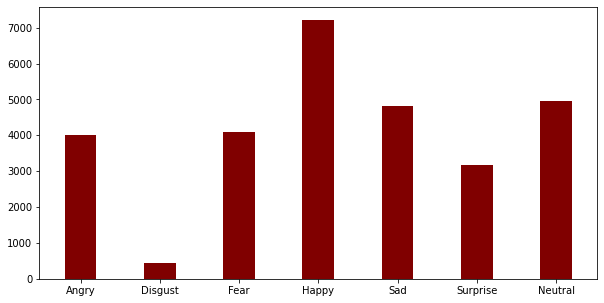

In [ ]:
# data = pd.read_csv('train.csv').values
# np.random.shuffle(data)
# all_raw_Y = data[:,0]
# data = np.unique(all_raw_Y, return_counts = True)
# print(data)
# classList = []
# values = []
# for i in range(7):
#   classList.append(emotions.get(i))
#   values.append(data[1][i])
# fig = plt.figure(figsize = (10, 5))
# plt.bar(classList, values, color ='maroon',
# 		width = 0.4)
# plt.show()

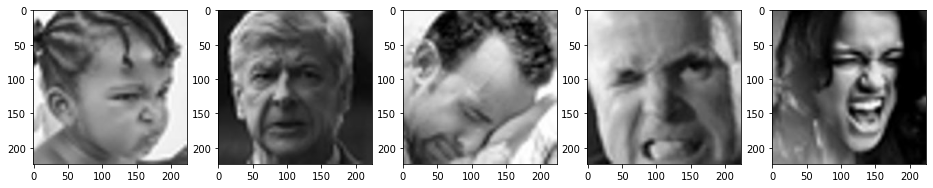

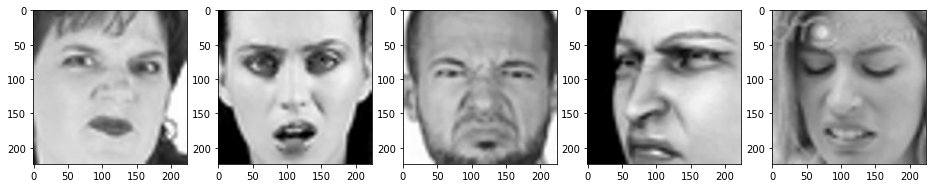

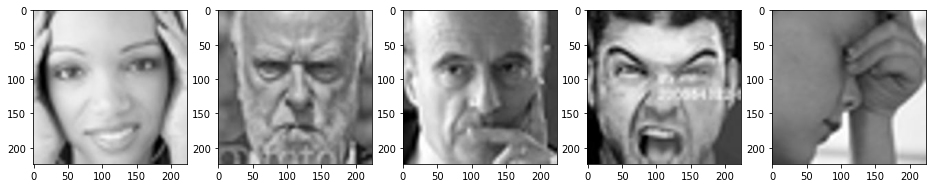

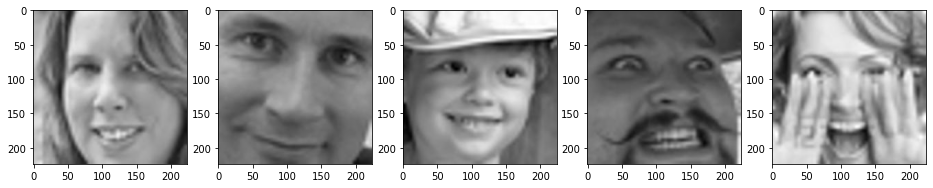

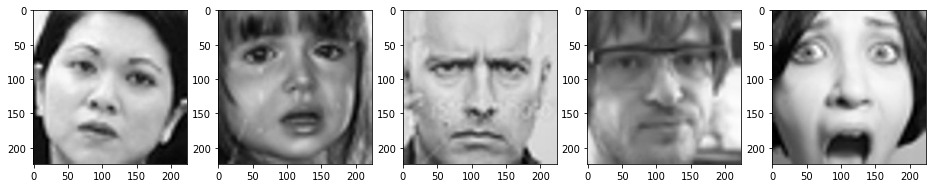

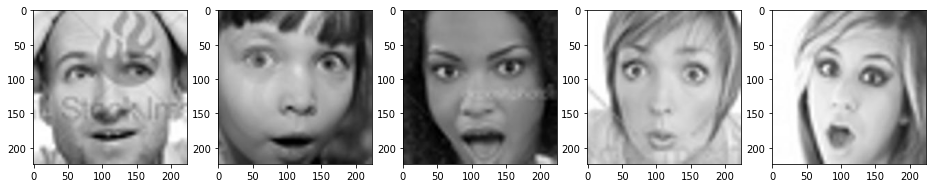

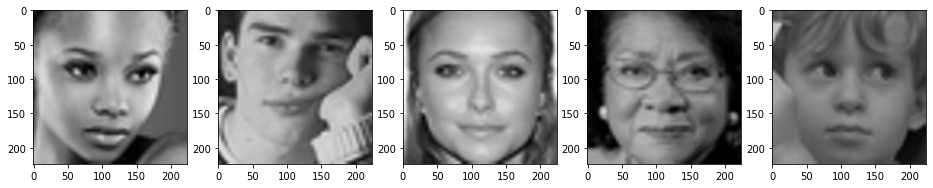

In [ ]:
# for j in range(7):
#   images = []
#   for i in range(11,16):
#     img_path = 'data/test/'+ emotions.get(j)+'/'+str(i+10)+'.jpeg'
#     image = load_img(img_path, target_size=(224, 224))
#     images.append(image)
#   fig, ax = plt.subplots(1,5, figsize=(16, 6))
#   l = [ax[i].imshow(images[i]) for i in range(0,5)]